#### Projeção gráfica com a solução da equação de Schrodinger mediante a um potencial harmônico

O conceito harmônico é frequentemente usado nas práticas de sistemas quânticos, portanto é um bom utilitário para estudos. Para a construção da solução devemos saber que o potêncial harmônico se da:

$$V(x) = \frac{m\cdot\omega^{2}\cdot x^{2}}{2}$$

transformando a equação, unidimensional, de Schrodinger:

$$H = \frac{-\hbar^{2}}{2m}\frac{d^{2}}{{dx}^{2}}+\frac{m\cdot\omega^{2}\cdot x^{2}}{2}$$

A partir do método analítico relatado por David Griffiths no livro base de Mecânica Quântica, podemos representar a solução com polinômios de Hermite $H_n(x)$ de forma que a função de onda pode ser representada como:

$$\psi_n(x)=(\frac{m\omega}{\pi\hbar})^{1/4}\cdot\frac{1}{\sqrt{2^n\cdot n!}} \cdot H_n(x)e^{-x^{2}/2}$$

e $H_n(x)$ pode ser tabelado como:

$$H_0=1$$
$$H_1=2x$$
$$H_2=4x^{2}-2$$
$$H_3=8x^{3}-12$$
$$.$$
$$.$$
$$.$$

Por fim, para que possamos entender todo processo que circunda a função de onda, devemos desenhá-la a partir da sua representação quadrática; sua densidade.

In [1]:
# A biblioteca de plotagem de gráficos do python
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from sympy import *
from scipy.integrate import trapz

%matplotlib inline

import ipywidgets as widgets
from IPython.display import display

from scipy.special import hermite
from math import factorial

In [2]:
# Definição do fator que multiplica o polinômio de Hermite, consideraremos que a massa da partícula é 1, 
# bem com a constante verdadeira de planck e o omega pertencente a equação, isso é possível porque o
# tamanho desses fatores são pequenos o suficiente para não serem necessários para a análise.

def N(n):
    return (1./np.pi)**(1/4)*1./np.sqrt(np.sqrt(np.pi)*2**n*factorial(n))

def psi(n, x):
    Hn=hermite(n)
    Px = N(n)*Hn(x)*np.exp(-0.5*x**2)
    return Px

0.5641895835477566


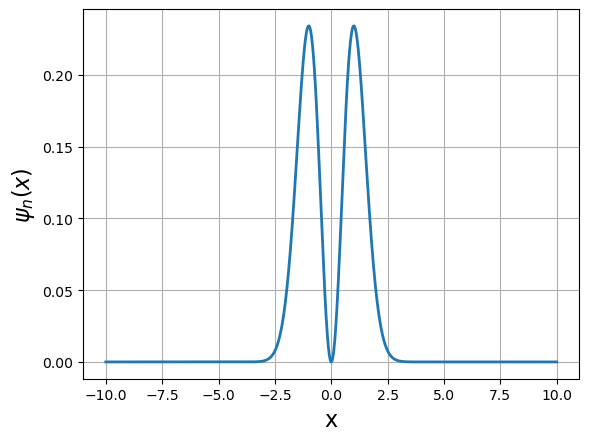

In [3]:
# Processo de integração numérica usando o método dos trapézios

x=np.linspace(-10,10,1000) # Espaçamento

psiquad=psi(1,x)**2

plt.plot(x,psiquad,lw=2) # Lineweight
    
plt.grid('on')  
plt.xlabel('x',fontsize=16)
plt.ylabel('$\psi_n(x)$',fontsize=16)

Integral = trapz(psiquad,x)

print(Integral)

In [4]:
# v é a variação do grau do polinômio de Hermite, x é a variável polinomial, comumente representado por epsilon 

@widgets.interact(v=(0,50))

def plot_psi(v=0):
    
    x=np.linspace(-10,10,1000)
    
    y=psi(v,x)**2
    
    plt.plot(x,y,lw=2) # Lineweight
    
    plt.grid('on')  
    plt.xlabel('x',fontsize=16)
    plt.ylabel('$\psi_n(x)$',fontsize=16)

interactive(children=(IntSlider(value=0, description='v', max=50), Output()), _dom_classes=('widget-interact',…

In [5]:
def E(v):
    return (v + 0.5)

# potencial
def V(x):
    return 0.5*x**2


In [6]:
# Quantidade de ondas
VMAX=8 

# Tamanho máximo do intervalo do gráfico
xmin, xmax = -np.sqrt(2*E(VMAX)), np.sqrt(2*E(VMAX))

x = np.linspace(xmin, xmax, 1000)


Text(0, 0.5, '$\\psi^2_n(x)$')

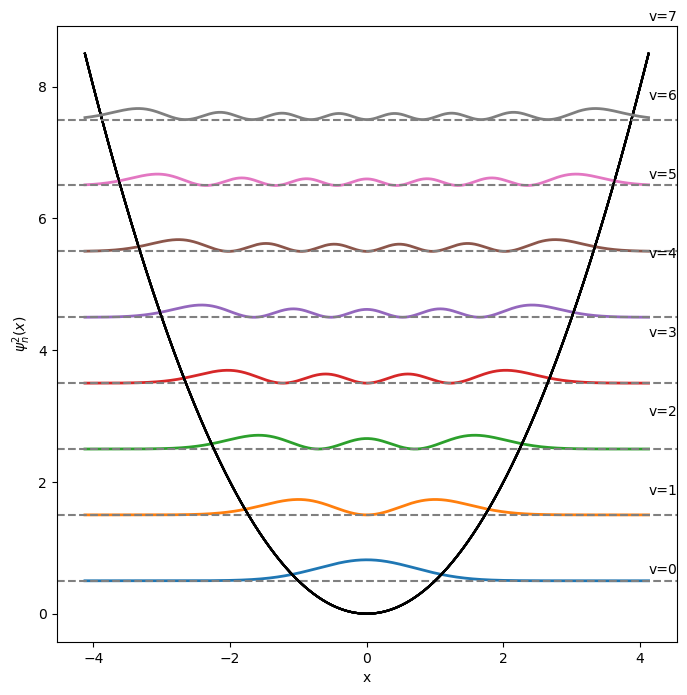

In [7]:
fig, ax = plt.subplots(figsize=(8,8))

for v in range(8):
     
    # plotando a parábola
    ax.plot(x,V(x),color='black')
    # alteração do psi quadrado para que um gráfico não sobreponha outro
    ax.plot(x,psi(v,x)**2 + E(v), lw=2)
    ax.axhline(E(v), color='gray', linestyle='--') 
    ax.text(xmax, 1.2*E(v), f"v={v}")

    
ax.set_xlabel('x')
ax.set_ylabel('$\psi^2_n(x)$')


Total Prob. in frame 0.005636253939642087
Total Prob. in frame 0.005636253939642091
Total Prob. in frame 0.005636253939642087
Total Prob. in frame 0.005636253939642087
Total Prob. in frame 0.005636253939642089
Total Prob. in frame 0.005636253939642091
Total Prob. in frame 0.005636253939642088
Total Prob. in frame 0.005636253939642092
Total Prob. in frame 0.005636253939642094
Total Prob. in frame 0.005636253939642094
Total Prob. in frame 0.005636253939642094
Total Prob. in frame 0.005636253939642095
Total Prob. in frame 0.005636253939642096
Total Prob. in frame 0.005636253939642098
Total Prob. in frame 0.005636253939642101
Total Prob. in frame 0.0056362539396421
Total Prob. in frame 0.005636253939642098
Total Prob. in frame 0.005636253939642099
Total Prob. in frame 0.005636253939642102
Total Prob. in frame 0.005636253939642103
Total Prob. in frame 0.005636253939642102
Total Prob. in frame 0.0056362539396421045
Total Prob. in frame 0.005636253939642102
Total Prob. in frame 0.005636253939

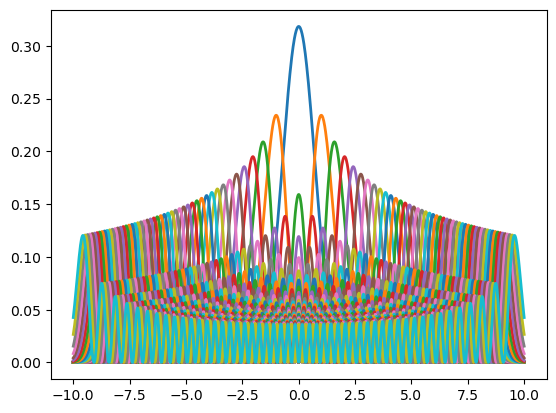

In [8]:
dx = 0.0002
for v in range(50):
    x=np.linspace(-10,10,1000)
    y=psi(v,x)**2
    print("Total Prob. in frame", np.sum(psi(v,x)**2)*dx)  
    plt.plot(x,y,lw=2) # Lineweight


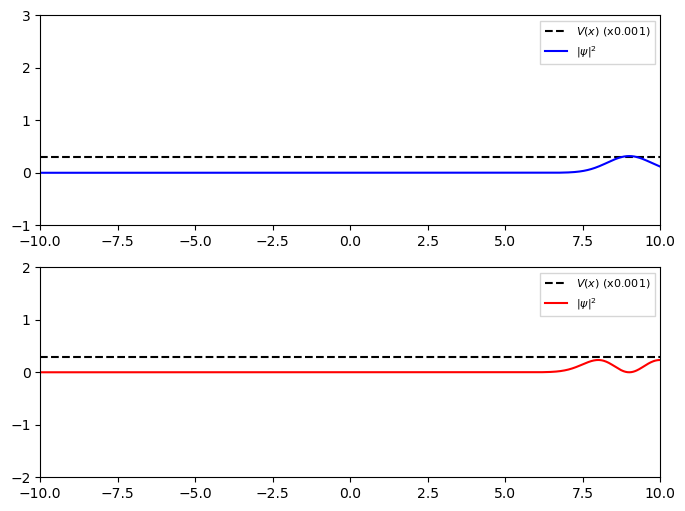

In [9]:
from matplotlib import animation

# Animação
fig = plt.figure(figsize=(8, 6))

ax1 = plt.subplot(2, 1, 1)
ax1.set_xlim(-10, 10)
ax1.set_ylim(-1, 3)
title = ax1.set_title('')
line11, = ax1.plot([], [], "k--", label=r"$V(x)$ (x0.001)")
line12, = ax1.plot([], [], "b", label=r"$\vert \psi \vert^2$")
plt.legend(loc=1, fontsize=8, fancybox=False)

ax2 = plt.subplot(2, 1, 2)
ax2.set_xlim(-10, 10)
ax2.set_ylim(-2, 2)
line21, = ax2.plot([], [], "k--", label=r"$V(x)$ (x0.001)")
line22, = ax2.plot([], [], "r", label=r"$\vert \psi \vert^2$")
plt.legend(loc=1, fontsize=8, fancybox=False)


def init():
    x=np.linspace(-10,10,1000)
    line11.set_data(x, 300 * 0.001)
    line21.set_data(x, 300 * 0.001)
    return line11, line21


def animate(i):
    x=np.linspace(-10,10,1000)
    if i<10:
        line12.set_data(x, psi(0,x+i)**2)
        line22.set_data(x, psi(1,x+i)**2)
    elif i>10:
        line12.set_data(x, psi(0,x-(i-20))**2)
        line22.set_data(x, psi(1,x-(i-20))**2)
    return line12, line22


anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=30, interval=200, blit=True)


# .mp4
anim.save('curvas.mp4', fps=15, extra_args=['-vcodec', 'libx264'], dpi=600)

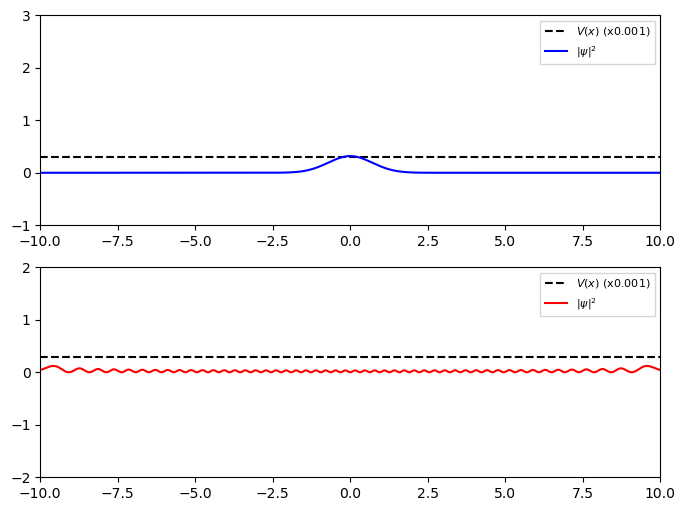

In [10]:
# Animação
fig = plt.figure(figsize=(8, 6))

ax1 = plt.subplot(2, 1, 1)
ax1.set_xlim(-10, 10)
ax1.set_ylim(-1, 3)
title = ax1.set_title('')
line11, = ax1.plot([], [], "k--", label=r"$V(x)$ (x0.001)")
line12, = ax1.plot([], [], "b", label=r"$\vert \psi \vert^2$")
plt.legend(loc=1, fontsize=8, fancybox=False)

ax2 = plt.subplot(2, 1, 2)
ax2.set_xlim(-10, 10)
ax2.set_ylim(-2, 2)
line21, = ax2.plot([], [], "k--", label=r"$V(x)$ (x0.001)")
line22, = ax2.plot([], [], "r", label=r"$\vert \psi \vert^2$")
plt.legend(loc=1, fontsize=8, fancybox=False)


def init():
    x=np.linspace(-10,10,1000)
    line11.set_data(x, 300 * 0.001)
    line21.set_data(x, 300 * 0.001)
    return line11, line21


def animate(i):
    x=np.linspace(-10,10,1000)
    line12.set_data(x, psi(0,x)**2)
    line22.set_data(x, psi(i,x)**2)
    return line12, line22


anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=200, blit=True)


# .mp4
anim.save('curvas2.mp4', fps=15, extra_args=['-vcodec', 'libx264'], dpi=600)

Para concretizar o resultado total da função de onda, devemos integrar a variação em tempo no nosso resultado com a exponencial:

$$e^{-i(n+1/2)\omega t}$$

tornando a função de onda variante em t, $\psi(x,t)$.

In [11]:
# Bibliotecas 3D

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [12]:
# Equação com o adicional da exponencial

def psixt(n, x, t):
    Hn=hermite(n)
    a = complex(1)
    Pxt = N(n)*Hn(x)*np.exp(-0.5*x**2)*np.exp(-a*(n+1/2)*t)
    return Pxt

In [13]:
x = np.linspace(-10, 10, 30)
y = np.linspace(-10, 10, 30)

X, Y = np.meshgrid(x, y) # Matriz gerada em um linspace, por exemplo, um linspace de 0 a 1 em x resulta emarray([[0. , 0.5, 1. ], [0. , 0.5, 1. ]])
Z = psixt(1, X, Y)**2

/home/gabriel/miniconda3/lib/python3.9/site-packages/numpy/ma/core.py:2829: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,
/home/gabriel/miniconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


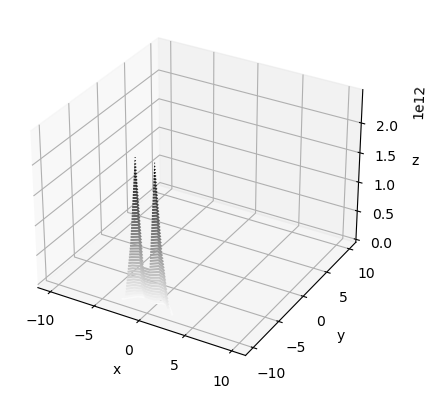

In [14]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [15]:
@widgets.interact(v=(0,50))

def plot_psi(v=0):
    
    x=np.linspace(-10,10,1000)
    
    Z=psixt(v,X,Y)**2
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.contour3D(X, Y, Z, 50, cmap='binary')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z');
    
    plt.grid('on')  
    plt.xlabel('x',fontsize=16)
    plt.ylabel('t',fontsize=16)

interactive(children=(IntSlider(value=0, description='v', max=50), Output()), _dom_classes=('widget-interact',…

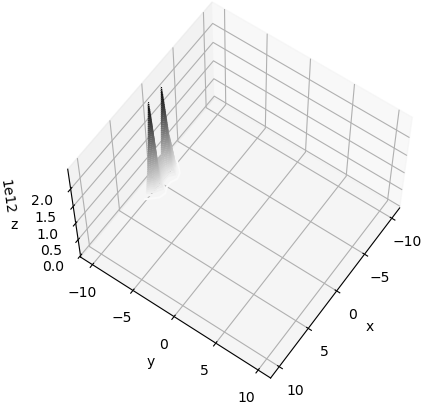

In [16]:
ax.view_init(60, 35)
fig

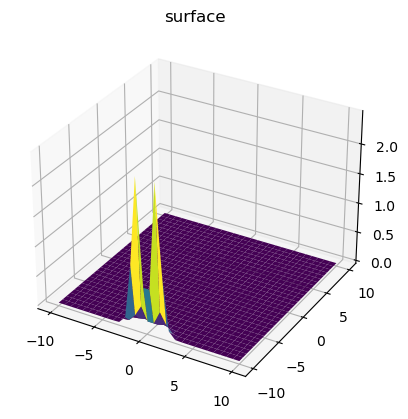

In [17]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');